                                         Medical insurance Cost Prediction Dataset Analysis

This project is a Machine Learning based project which basically helps in predicting the medical insurance cost or the charges of a person based on their personal and health related information.  

Here, we will be using the datset of the Medical Cost prediction, imported from kaggle which is based maily oon the people from USA. 

The main objective of the project is to build a model that can estimate, how much insurance a person will will have to pay for using the features like the: 

1. Age 
2. Gender
3. BMI (Body Mass Index) 
4. Number of Children 
5. Smoking Status 
6. Region  

hence, these are the features, that we wil be using for the cos prediction. 

# Features Explanation 
We will explain all the features, that how they are necessary for making the predictions. 

# 1.Age 
This  is basically the age of the person in years. Old peple usually have higher insurance costs. 

# 2.Sex  
This is basically the gender of the person. It helps to analyze the cost difference bwtween the genders. 

# 3.BMI (Body Mass Index) 
It measures the fat based on the height and the mass of a person.  
Higher BMI means higher health risk and higher insuracne cost.  

# 4.Children 
Higher number of children means that it will cover a slightly more premium. 

# 5.Smoker 
Smokers ususlly have a higher health risk and hence they have a higher health insurance. 

# 6.Region 
here the whole data is based on the 4 regions of USA. The values include the northeast, northwest, southeast, southwest and have different costs. 

# 7. charges 
This is the output variable and hence this is the prediction of the charges. 

# Random Forest Regressor 
Here, i have used the Random Forest Regressor ML Algorithm which is used to handle the complex non linear relations and can make more accurate preictions. 

Also, the Random Foorest Regressor helps in making the decisions based on combining the results of the decision trees.  

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv("medical_insurance.csv") 
data 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [3]:
data.shape  
# Here, this is the shape of the dataset 

(2772, 7)

In [4]:
data.info() 
# This is the info of the whole data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
data.describe()  
# here, this is the description of the whole data 

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()  
# Here, as we can see that here, there are no empty values in the whole dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
categorical_col = data.select_dtypes(include = ["object", "category"]).columns 

print(categorical_col) 

Index(['sex', 'smoker', 'region'], dtype='object')


Since, there are no empty values, so this data is safe and useful for the preprocessing and data analysis.  

Here, as we can see that the sex, smoker and region have categorical columns. 

In [8]:
print(data["sex"].unique())  
print(data["smoker"].unique())  
print(data["region"].unique())  

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
# Now, we will be applying the label encoder to convert the categorical into numeric values 

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 

for col in ["sex","region", "smoker"]: 
    data[col] = le.fit_transform(data[col])  

data 

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8569.86180
2768,21,0,34.600,0,0,3,2020.17700
2769,19,1,26.030,1,1,1,16450.89470
2770,23,1,18.715,0,0,1,21595.38229


In [10]:
print(data["sex"].unique())  
print(data["smoker"].unique())  
print(data["region"].unique())  

[0 1]
[1 0]
[3 2 1 0]


Now, we will see that how the relation between the encoded variables and the numeric values 

1. Sex: 
      Female > 0, male > 1 

2. Smoker: 
      Yes > 1, No > 0   

3. Region: 
      3 > southwest, 2 > southeast, 1 > northwest, 0 > northeast 

In [11]:
# Now, we will be dividing the whole dataa into the features and labels 

x = data.drop(["charges"], axis = 1) 
x  

# this is the independent feature label, based on what the predictions have been made  

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2
2768,21,0,34.600,0,0,3
2769,19,1,26.030,1,1,1
2770,23,1,18.715,0,0,1


In [12]:
y = data.filter(["charges"], axis = 1) 
y  

# This is the dependent features, which have the predictions made on them. 

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
2767,8569.86180
2768,2020.17700
2769,16450.89470
2770,21595.38229


Now, we will be applying the train, test and splitt on the model to apply the ml algorithm to divide the data into training and testing sets. 

In [13]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2) 


In [14]:
x_train 
# Dta on which the model is trained 

,age,sex,bmi,children,smoker,region
1864,21,1,36.850,0,0,2
1997,38,0,34.800,2,0,3
1336,21,0,25.800,0,0,3
655,52,0,25.300,2,1,2
261,20,0,26.840,1,1,2
...,...,...,...,...,...,...
1638,54,1,34.210,2,1,2
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0


In [15]:
x_test 
# Data on which the model is tested 

,age,sex,bmi,children,smoker,region
1106,49,0,29.925,0,0,1
1321,62,1,26.695,0,1,0
2313,57,0,20.100,1,0,3
2274,22,1,39.500,0,0,3
1432,18,0,38.665,2,0,0
...,...,...,...,...,...,...
930,26,1,46.530,1,0,2
2610,41,1,23.940,1,0,0
1700,27,0,31.400,0,1,3
100,41,0,31.600,0,0,3


In [16]:
y_train 
# Data on which the model is trained 

,charges
1864,1534.30450
1997,6571.54400
1336,2007.94500
655,24667.41900
261,17085.26760
...,...
1638,44260.74990
1095,4561.18850
1130,8582.30230
1294,11931.12525


In [17]:
y_test 
# Data on which the model is tested 

,charges
1106,8988.15875
1321,28101.33305
2313,12032.32600
2274,1682.59700
1432,3393.35635
...,...
930,2927.06470
2610,6858.47960
1700,34838.87300
100,6186.12700


In [18]:
# Now, we will be applying the standard scaler feature  
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() 

x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test) 

In [19]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(n_estimators = 500, random_state =42) 

regressor = model.fit(x_train, y_train) 
regressor 

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
y_pred =  regressor.predict(x_test) 
y_pred  

# The predictioons of the test data has been made 

array([ 9221.84501492, 28304.3087443 , 12777.50009724,  1712.81713362,
        5183.28658748, 24201.98255382,  4891.63041542, 47368.60972186,
        8731.94974576,  3444.0195668 , 11233.28575482, 11365.91043058,
        3499.57541122, 16720.14168824,  5709.09692958,  8499.7157865 ,
       22876.84960644, 11509.93898554,  3822.25227254, 19584.12861506,
       12134.2579742 , 52965.91094986, 23230.33481304, 48659.07209928,
       33789.743682  ,  9485.37772412,  1711.22731966, 14259.1656344 ,
       18870.64339214,  1211.63868098, 11108.51822832,  5365.0698585 ,
        1645.287748  ,  3842.83682044, 24795.70760518,  8420.10633944,
        2228.1757502 ,  3060.0396198 ,  6349.8527706 , 21953.922757  ,
        4232.05981558,  7265.34968228,  9890.37375144,  3632.15942186,
        2112.4433833 , 46944.14535604,  3953.19768122, 40963.13461974,
        3354.10911018,  6284.54374882, 43406.29278668,  9376.21345664,
        3538.01849938,  4753.16229966,  4039.11716592, 12768.40253176,
      

Now, after making all the data analysis, we will be making the analysis of the whole project by evaluating the metrics. 

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  

print("R2 Score: ", r2_score(y_test, y_pred))  

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))  

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred)) 

print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))  

# Here, the r2 score is basically like the accuracy of the model which is about 95%  

R2 Score:  0.9509587215645661
Mean Absolute Error:  1309.5432912720757
Mean Squared Error:  7526902.355408751
Root Mean Squared Error:  2743.520066521977


# Visualization 
Now, comes the important feature of the visualization for the whole pproject, which helps iin the easy visualization oof the whoole dataset analysis. 

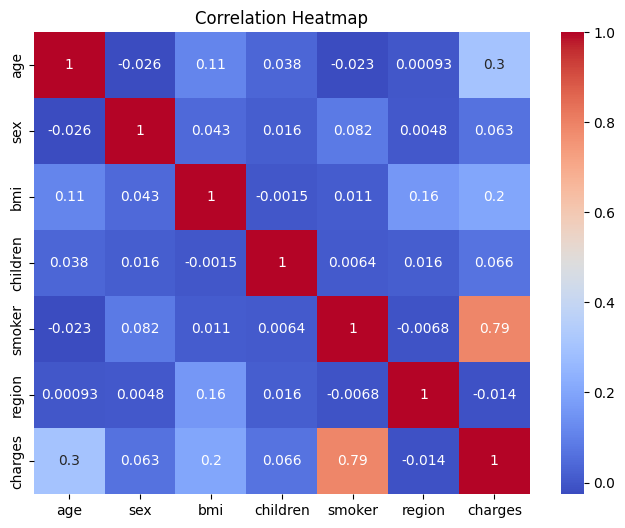

In [22]:
# plotting of the Correlation Heatmap 

plt.figure(figsize = (8,6)) 
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = "coolwarm") 
plt.title("Correlation Heatmap") 
plt.show() 

Here, as we can see that the correlation heatmap shows that the relation between the smokers and the charges have a high relation.  

Smoer, smoker, bmi and age have a high relation between them. 

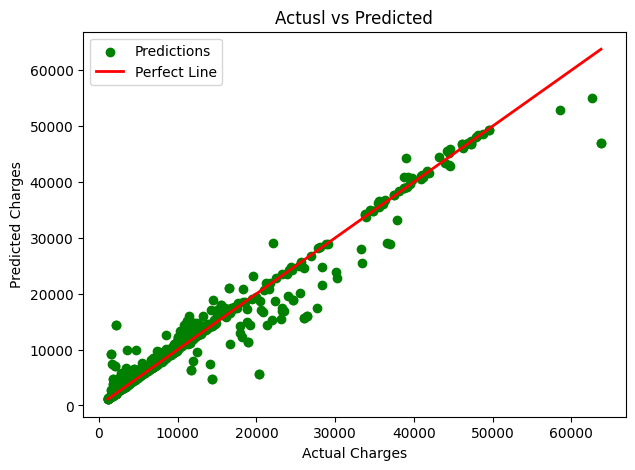

In [23]:
# Now comes the plotting of the Actiual vs Predicted Plot 

plt.figure(figsize = (7,5)) 
plt.scatter(y_test, y_pred, color = "green", label = "Predictions") 

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color = "red", linewidth = 2, label = "Perfect Line") 

plt.xlabel("Actual Charges") 
plt.ylabel("Predicted Charges") 
plt.title("Actusl vs Predicted") 
plt.legend()
plt.show() 

The above plot can be plotted more professionally by using the seaborn library. 

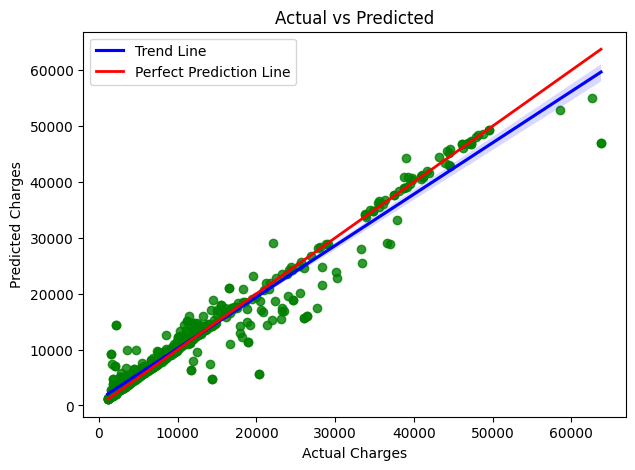

In [24]:
plt.figure(figsize=(7,5))

# Scatter + trend line from seaborn
sns.regplot(
    x=y_test,
    y=y_pred,
    scatter_kws={"color": "green", "label": "Predicted Points"},
    line_kws={"color": "blue", "label": "Trend Line"}
)

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linewidth=2,
    label="Perfect Prediction Line"
)

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted")

plt.legend()
plt.show()

Now, we will be plotting the feature importance plot for making the analysis. 

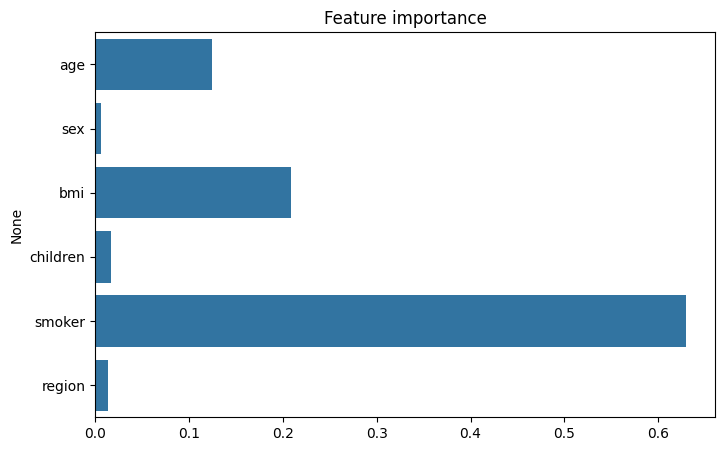

In [25]:
importance = regressor.feature_importances_ 
features = x.columns  

plt.figure(figsize = (8,5)) 
sns.barplot(x = importance, y = features) 
plt.title("Feature importance") 
plt.show() 

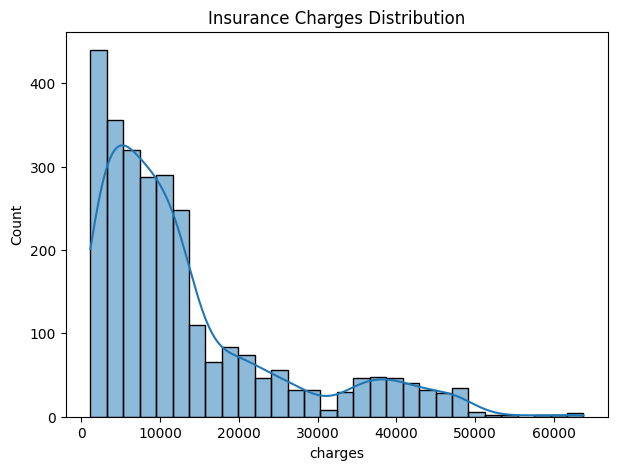

In [26]:
# Charges distribution plot 
plt.figure(figsize = (7,5)) 
sns.histplot(data["charges"], bins = 30, kde = True) 
plt.title("Insurance Charges Distribution") 
plt.show() 

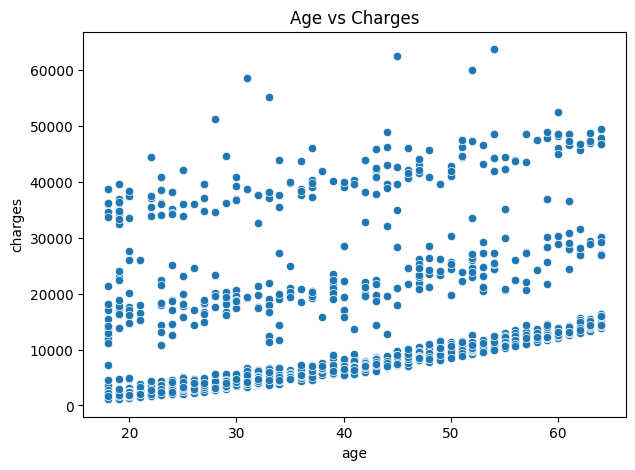

In [27]:
# Plot of the charges vs smoker  
plt.figure(figsize = (7,5)) 
sns.scatterplot(x = "age", y = "charges", data = data) 
plt.title("Age vs Charges") 
plt.show()  

# This graph basically shows that those with higher ages have basically higher insurance values 

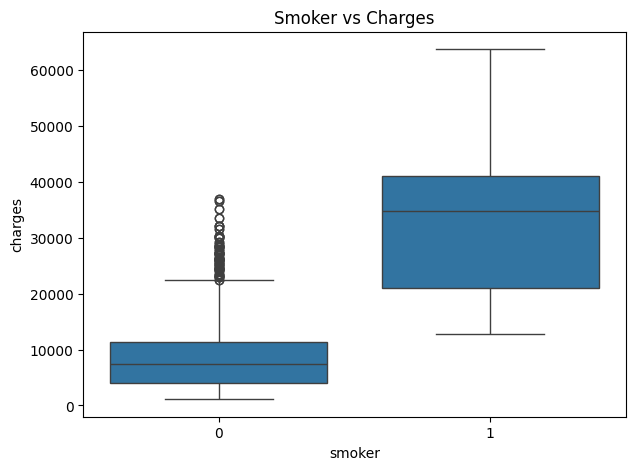

In [28]:
# charges plot by smoker 
plt.figure(figsize = (7,5)) 
sns.boxplot(x = "smoker", y = "charges", data = data) 
plt.title("Smoker vs Charges") 
plt.show()  

# Here, this box plot basically shows that the smokers have to pay higher insurance. 

# Prediction 
Now, comes the part of making the predictions on the data. 

In [29]:
data.iloc[100] 

age           41.000
sex            0.000
bmi           31.600
children       0.000
smoker         0.000
region         3.000
charges     6186.127
Name: 100, dtype: float64

In [30]:
single_record = sc.transform(x.values[100].reshape(1,-1)) 

predicted_outcome = regressor.predict(single_record) 

print(predicted_outcome)  

# Here, as we can see that the prediction is made quite accurately. 

[6349.8527706]


c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Now, comes the prediction part on the new dataset, for checking the model. 

In [31]:
new_customer1 = pd.DataFrame({
    "age": [35],
    "sex": ["male"],
    "bmi": [27.8],
    "children": [2],
    "smoker": ["yes"],
    "region": ["northwest"] 
    
})  
new_customer1 

,age,sex,bmi,children,smoker,region
0,35,male,27.8,2,yes,northwest


In [32]:
le = LabelEncoder() 

for col in ["sex","region", "smoker"]: 
    new_customer1[col] = le.fit_transform(new_customer1[col])  

new_customer1 

,age,sex,bmi,children,smoker,region
0,35,0,27.8,2,0,0


In [33]:
new_customer1 = sc.transform(new_customer1) 

prediction =  regressor.predict(new_customer1)  

print("The predicted cost is: ", prediction[0]) 

The predicted cost is:  7163.560685400022


In [40]:
new_customer2 = pd.DataFrame({
    "age": [89],
    "sex": ["male"],
    "bmi": [27.8],
    "children": [5],
    "smoker": ["yes"],
    "region": ["northeast"] 
    
})  
new_customer2 

,age,sex,bmi,children,smoker,region
0,89,male,27.8,5,yes,northeast


In [41]:
le = LabelEncoder() 

for col in ["sex","region", "smoker"]: 
    new_customer2[col] = le.fit_transform(new_customer2[col])  

new_customer2 

,age,sex,bmi,children,smoker,region
0,89,0,27.8,5,0,0


In [42]:
new_customer2 = sc.transform(new_customer2) 

prediction =  regressor.predict(new_customer2)  

print("The predicted cost is: ", prediction[0]) 

The predicted cost is:  26734.434254140142
